In [19]:
import networkx as nx
from graph_gen_utils import encode_graph, graph_encodings, gen_save_graphs, \
    generate_graph, draw_graph, edge_encoding, node_encoding, encode_graph
from graph_encoding import node_to_name, node_to_politician,\
    node_to_GoT_characters, node_to_sp_characters, expert

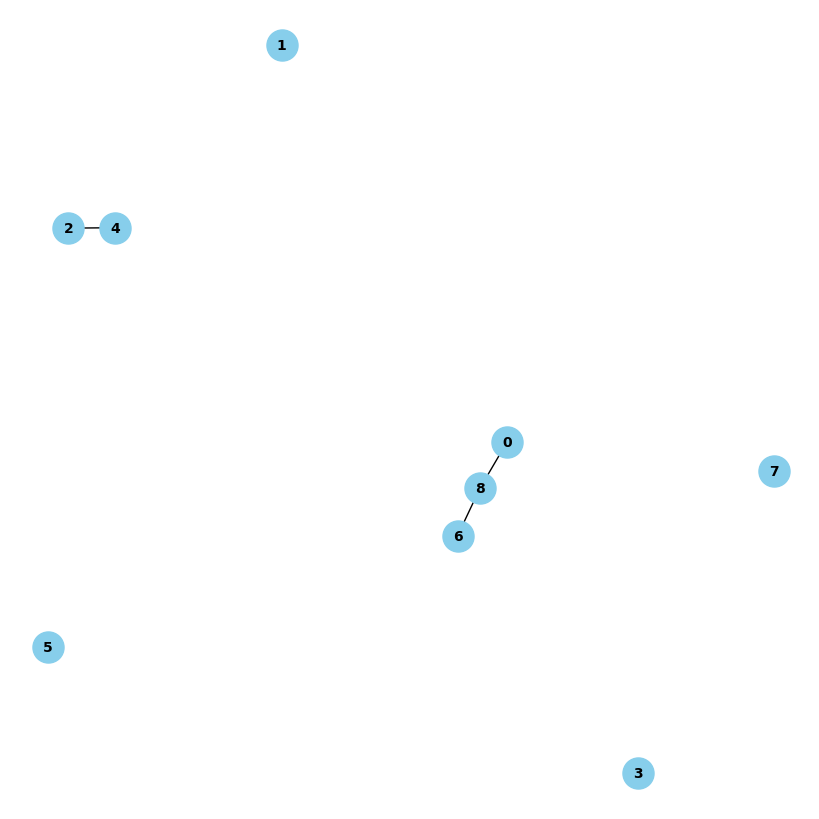

In [2]:
graph_type = 'ER' # Change this to any of the supported types
graph = generate_graph(graph_type)
draw_graph(graph)

In [3]:
print(edge_encoding(graph, 'Parenthesis'))

{(0, 8): '(0, 8)', (2, 4): '(2, 4)', (6, 8): '(6, 8)'}


In [4]:
all_encoding_types = ['Adjacency', 'Politician', 'Incident', 'Friendship',
'Co-authorship', 'SP', 'GOT', 'Social network', 'Expert']
all_graph_types = ['ER', 'BA', 'SBM', 'SFN', 'Path', 'Star', 'Complete']
# ['ER', 'BA', 'WS', 'SF', 'Chung-Lu', 'BA2', 'WS2',
# 'SF2', 'Chung-Lu2']

In [5]:
from itertools import product

In [6]:
len(list(product(all_graph_types, all_encoding_types)))

63

In [7]:
from graphqa import graph_task_generator
from graphqa import graph_task_utils as utils

2024-05-01 00:03:38.565139: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 00:03:38.593247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 00:03:38.838232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 00:03:38.840123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 00:03:40.393132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
import tensorflow as tf

In [9]:
data = './data'
task_path = '/tasks'
graph_path = '/graphs'

full_task_path = data + task_path
full_graph_path = data + graph_path

full_task_path, full_graph_path

('./data/tasks', './data/graphs')

In [10]:
algorithms = ['er', 'ba', 'sbm', 'sfn', 'complete', 'star', 'path']
text_encoders = [
'adjacency',
'incident',
'coauthorship',
'friendship',
'south_park',
'got',
'social_network',
'politician',
'expert',
]

graphs = [utils.load_graphs(
          full_graph_path,
          algorithm,
          'test',
      ) for algorithm in algorithms]

In [11]:
generator_algorithms = []
for algorithm in algorithms:
    generator_algorithms += [algorithm] * len(graphs)

In [12]:
graphs = []
generator_algorithms = []
for algorithm in algorithms:
    loaded_graphs = utils.load_graphs(
        full_graph_path,
        algorithm,
        'test',
    )
    graphs += loaded_graphs
    generator_algorithms += [algorithm] * len(loaded_graphs)

In [13]:
len(graphs), len(generator_algorithms)

(3500, 3500)

In [14]:
graph_task_generator.TASK_CLASS.keys()

dict_keys(['edge_existence', 'node_degree', 'node_count', 'edge_count', 'connected_nodes', 'cycle_check', 'disconnected_nodes', 'reachability', 'shortest_path', 'maximum_flow', 'triangle_counting', 'node_classification'])

## Global Structure understanding

In [15]:
print(encode_graph(graph, 'Adjacency'))

Encoding type: Adjacency, node_encoding_type='Integer', edge_encoding_type='Parenthesis'
encoded_nodes={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8'}
Parenthesis: G describes a parenthesis graph among 0, 1, 2, 3, 4, 5, 6, 7, 8.
The edges in G are:
(0, 8)
(2, 4)
(6, 8)



In [16]:
print(encode_graph(graph, 'Politician'))

Encoding type: Politician, node_encoding_type='American Politician First Names', edge_encoding_type='Social Network'
encoded_nodes={0: 'Barack', 1: 'Jimmy', 2: 'Arnold', 3: 'Bernie', 4: 'Bill', 5: 'Kamala', 6: 'Hillary', 7: 'Elizabeth', 8: 'John'}
Social Network: G describes a social network graph among Barack, Jimmy, Arnold, Bernie, Bill, Kamala, Hillary, Elizabeth, John.
The edges in G are:
Barack and John are connected.
Arnold and Bill are connected.
Hillary and John are connected.



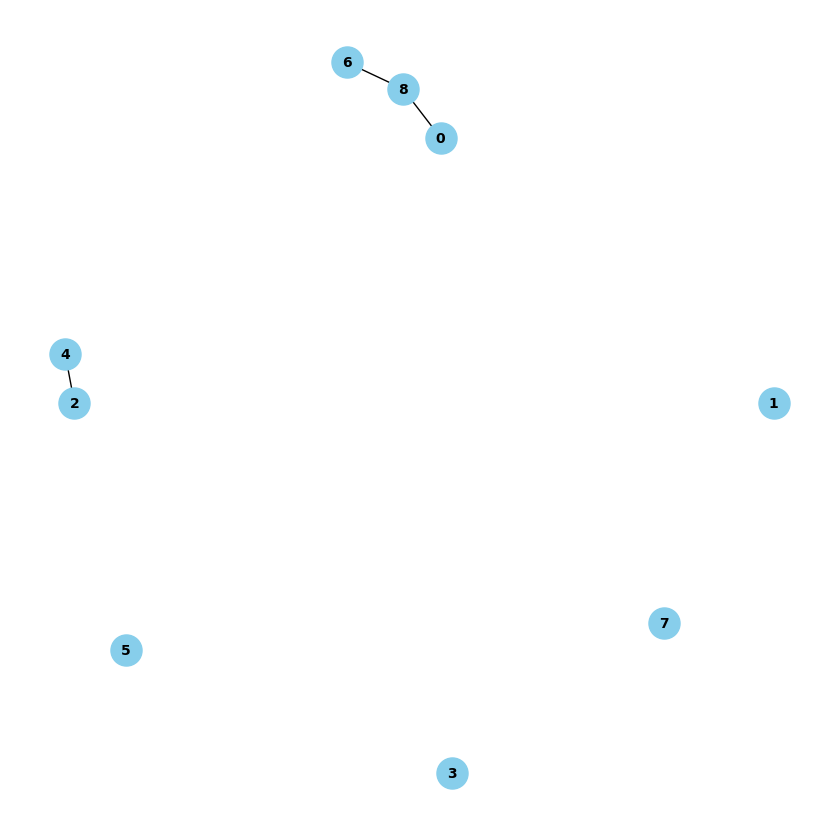

In [18]:
draw_graph(graph)

In [20]:
S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]
S

In [31]:
def island_encoding(graph, encoding_type: str, list_of_encoded_nodes: list = None):
    """
    Encodes a graph using the island encoding.
    """
    # desc = ""
        
    desc = encode_graph(graph, encoding_type, list_of_encoded_nodes)
    
    # add island encoding in prompt
    S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]
    number_of_islands = len(S)
    desc += "There are {} number of islands. ".format(number_of_islands)
    for i, island in enumerate(S):
        island_nodes = list(island.nodes())
        island_nodes.sort()
        desc += f" \n This is island {i+1} of {number_of_islands}. It contains the nodes {island_nodes}."
    
    return desc

    

In [22]:
for s in S:
    # draw_graph(s)
    print(s.nodes())

[0, 8, 6]
[1]
[2, 4]
[3]
[5]
[7]


In [32]:
print(island_encoding(graph, 'Adjacency'))

Encoding type: Adjacency, node_encoding_type='Integer', edge_encoding_type='Parenthesis'
encoded_nodes={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8'}
Parenthesis: G describes a parenthesis graph among 0, 1, 2, 3, 4, 5, 6, 7, 8.
The edges in G are:
(0, 8)
(2, 4)
(6, 8)
There are 6 number of islands.  
 This is island 1 of 6. It contains the nodes [0, 6, 8]. 
 This is island 2 of 6. It contains the nodes [1]. 
 This is island 3 of 6. It contains the nodes [2, 4]. 
 This is island 4 of 6. It contains the nodes [3]. 
 This is island 5 of 6. It contains the nodes [5]. 
 This is island 6 of 6. It contains the nodes [7].


In [33]:
filename = 'xyz.txt'
filename.split('.')

['xyz', 'txt']

In [34]:
import os

In [35]:
basename, ext = os.path.splitext(filename)
new_basename = basename+'_island'
new_filename = new_basename+ext

In [36]:
new_filename

'xyz_island.txt'